# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import numpy as np
import seaborn as sns  # Pastikan seaborn diimpor sebelum digunakan
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [7]:
sales_df= pd.read_csv('https://raw.githubusercontent.com/Neldi30/Machine-Learning-Pemula-/refs/heads/main/Dataset_Clustering_2500.csv')
sales_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Order Weekday,Unit Margin
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,2014,10,fri,173.87
1,North America,Canada,Vegetables,Online,M,3018,154.06,90.93,464953.08,274426.74,190526.34,2011,11,sun,63.13
2,Middle East and North Africa,Libya,Baby Food,Offline,C,1517,255.28,159.42,387259.76,241840.14,145419.62,2016,10,sun,95.86
3,Asia,Japan,Cereal,Offline,C,3322,205.70,117.11,683335.40,389039.42,294295.98,2010,4,fri,88.59
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,9845,9.33,6.92,91853.85,68127.40,23726.45,2011,8,mon,2.41


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          2500 non-null   object 
 1   Country         2500 non-null   object 
 2   Item Type       2500 non-null   object 
 3   Sales Channel   2500 non-null   object 
 4   Order Priority  2500 non-null   object 
 5   Units Sold      2500 non-null   int64  
 6   Unit Price      2500 non-null   float64
 7   Unit Cost       2500 non-null   float64
 8   Total Revenue   2500 non-null   float64
 9   Total Cost      2500 non-null   float64
 10  Total Profit    2500 non-null   float64
 11  Order year      2500 non-null   int64  
 12  Order Month     2500 non-null   int64  
 13  Order Weekday   2500 non-null   object 
 14  Unit Margin     2500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 293.1+ KB


In [10]:
print(sales_df.dtypes)


Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
Order year          int64
Order Month         int64
Order Weekday      object
Unit Margin       float64
dtype: object


In [11]:
numeric_df = sales_df.select_dtypes(include=['number'])  # Hanya numerik
categorical_df = sales_df.select_dtypes(include=['object'])  # Hanya kategorikal


In [12]:
for col in categorical_df.columns:
    sales_df[col].fillna(sales_df[col].mode()[0], inplace=True)  # Isi dengan nilai yang paling umum


C:\Users\taufi\AppData\Local\Temp\ipykernel_24292\259945898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df[col].fillna(sales_df[col].mode()[0], inplace=True)  # Isi dengan nilai yang paling umum


In [13]:
sales_df.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Unit Margin
count,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,5117.289600,255.156916,179.258936,1.304777e+06,9.178272e+05,3.869501e+05,2017.122800,6.504400,75.897980
std,2874.791978,174.921106,136.866139,1.257650e+06,9.542259e+05,3.758263e+05,4.111068,3.433292,52.558413
min,13.000000,5.050000,3.920000,1.373600e+03,1.134240e+03,2.393600e+02,2010.000000,1.000000,0.710000
25%,2533.000000,109.280000,68.127500,3.532631e+05,2.235194e+05,9.833092e+04,2014.000000,3.000000,30.555000
50%,5181.500000,222.600000,154.350000,8.995252e+05,5.932809e+05,2.757881e+05,2017.000000,7.000000,63.750000
75%,7636.500000,389.285000,263.330000,1.904818e+06,1.311355e+06,5.525131e+05,2020.250000,9.000000,108.265000
max,9999.000000,668.270000,524.960000,6.617210e+06,5.204978e+06,2.000078e+06,2025.000000,12.000000,244.560000


In [14]:
# Memastikan hanya kolom numerik yang dihitung mean-nya
numerical_cols = sales_df.select_dtypes(include=['number']).columns
sales_df[numerical_cols] = sales_df[numerical_cols].fillna(sales_df[numerical_cols].mean())

# Cetak jumlah nilai yang hilang setelah pengisian
print("Jumlah nilai yang hilang setelah pengisian:")
print(sales_df.isnull().sum())


Jumlah nilai yang hilang setelah pengisian:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Order year        0
Order Month       0
Order Weekday     0
Unit Margin       0
dtype: int64



Statistik Deskriptif:
        Units Sold   Unit Price    Unit Cost  Total Revenue    Total Cost  \
count  2500.000000  2500.000000  2500.000000   2.500000e+03  2.500000e+03   
mean   5117.289600   255.156916   179.258936   1.304777e+06  9.178272e+05   
std    2874.791978   174.921106   136.866139   1.257650e+06  9.542259e+05   
min      13.000000     5.050000     3.920000   1.373600e+03  1.134240e+03   
25%    2533.000000   109.280000    68.127500   3.532631e+05  2.235194e+05   
50%    5181.500000   222.600000   154.350000   8.995252e+05  5.932809e+05   
75%    7636.500000   389.285000   263.330000   1.904818e+06  1.311355e+06   
max    9999.000000   668.270000   524.960000   6.617210e+06  5.204978e+06   

       Total Profit   Order year  Order Month  Unit Margin  
count  2.500000e+03  2500.000000  2500.000000  2500.000000  
mean   3.869501e+05  2017.122800     6.504400    75.897980  
std    3.758263e+05     4.111068     3.433292    52.558413  
min    2.393600e+02  2010.000000     1.

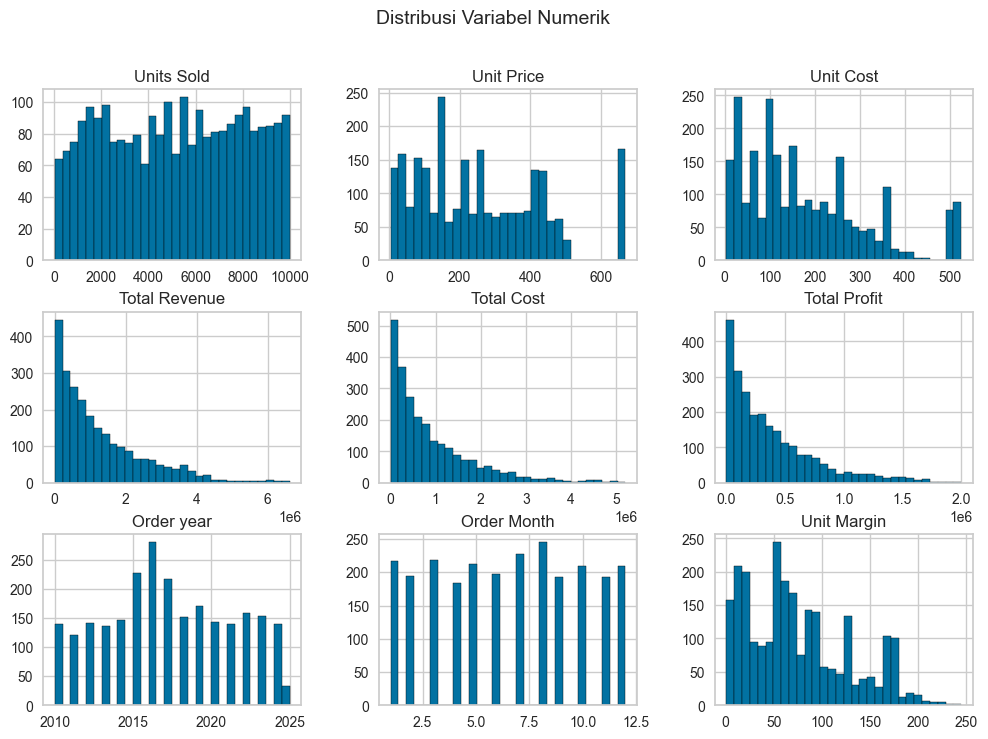

In [16]:
# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(sales_df.describe())

# Visualisasi distribusi numerik
sales_df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

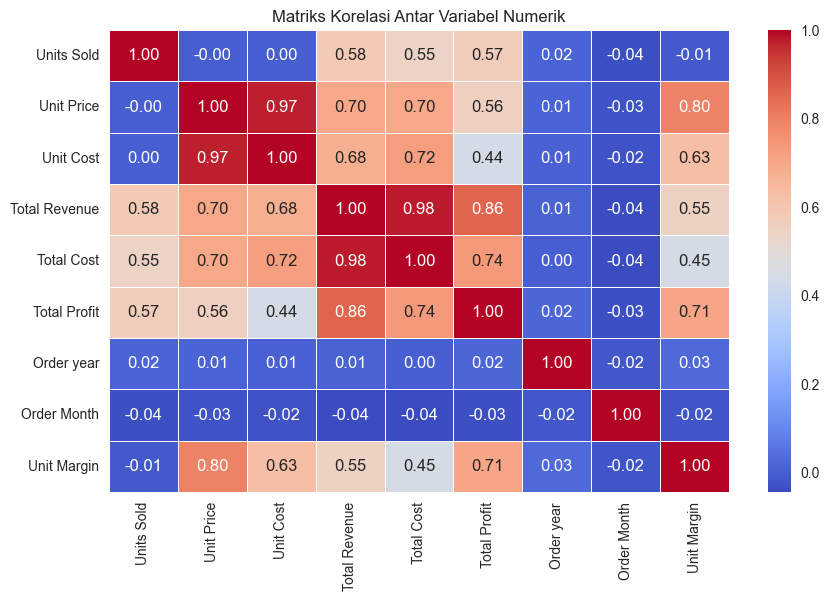

In [17]:
# Pilih hanya kolom numerik
numerical_data = sales_df.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()


C:\Users\taufi\AppData\Local\Temp\ipykernel_24292\4058537122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales_df["Order Priority"], palette="viridis")


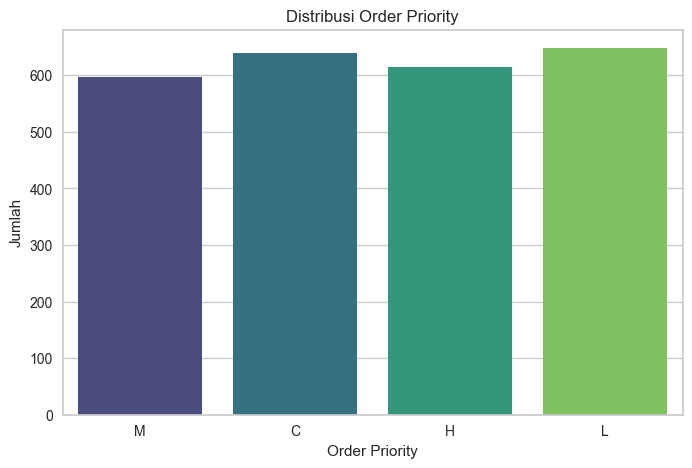

In [18]:
# Plot kategori Order Priority
plt.figure(figsize=(8, 5))
sns.countplot(x=sales_df["Order Priority"], palette="viridis")
plt.title("Distribusi Order Priority")
plt.xlabel("Order Priority")
plt.ylabel("Jumlah")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [19]:
print(sales_df.isnull().sum())


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Order year        0
Order Month       0
Order Weekday     0
Unit Margin       0
dtype: int64


In [20]:
# Mengecek data duplikat
print("Jumlah data duplikat:", sales_df.duplicated().sum())

# Hapus duplikat jika ada
sales_df = sales_df.drop_duplicates()


Jumlah data duplikat: 0


In [21]:
scaler = StandardScaler()
sales_df[numerical_cols] = scaler.fit_transform(sales_df[numerical_cols])


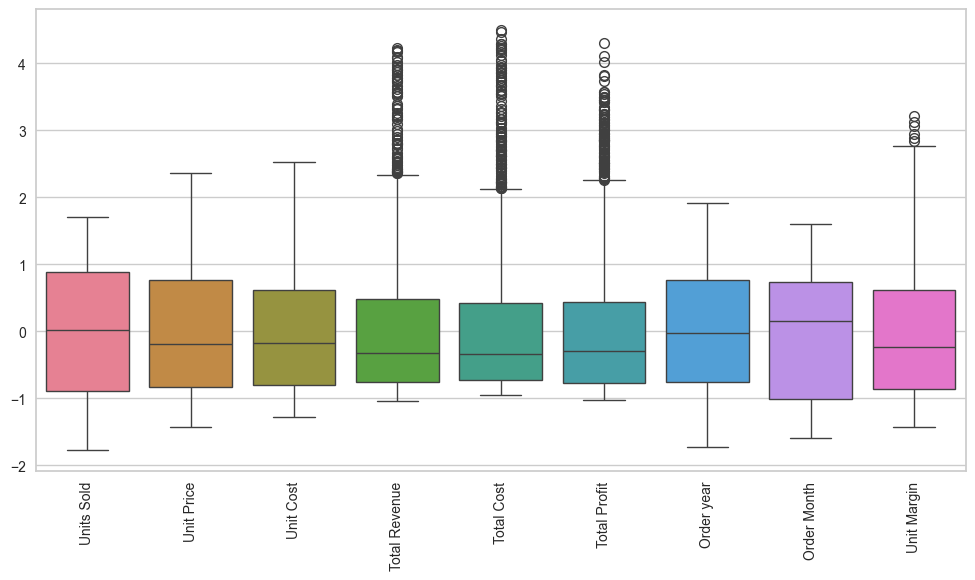

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

In [23]:
sales_df["Total Revenue"] = winsorize(sales_df["Total Revenue"], limits=[0.05, 0.05])
sales_df["Total Cost"] = winsorize(sales_df["Total Cost"], limits=[0.05, 0.05])
sales_df["Total Profit"] = winsorize(sales_df["Total Profit"], limits=[0.05, 0.05])


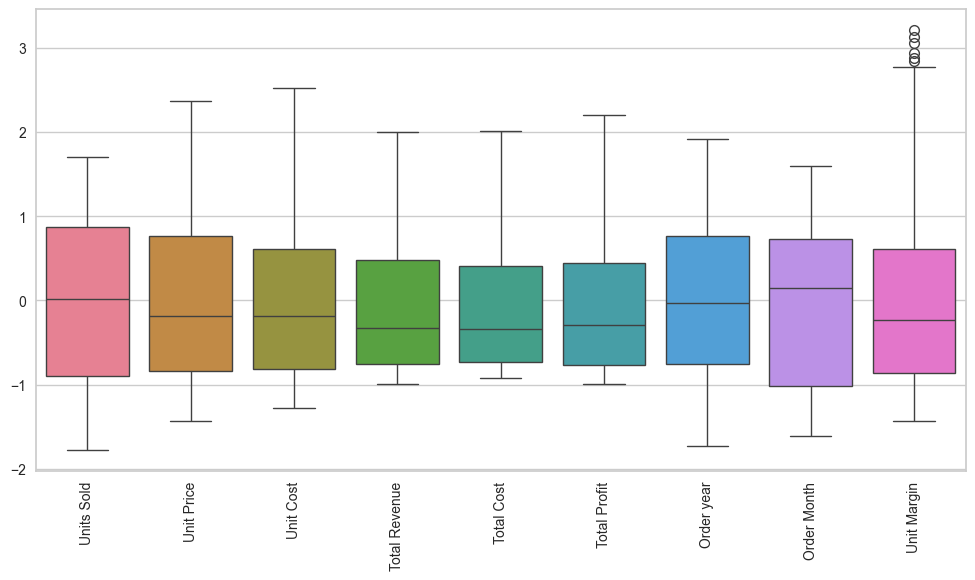

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

In [25]:
categorical_cols = sales_df.select_dtypes(include=['object']).columns

# Melakukan encoding pada kolom kategorikal
encoder = LabelEncoder()
for col in categorical_cols:
    sales_df[col] = encoder.fit_transform(sales_df[col])

In [26]:
sales_df['Profit Category'] = pd.cut(sales_df['Total Profit'], bins=3, labels=["Low", "Medium", "High"])


In [28]:
numeric_data = sales_df.select_dtypes(include=['number'])

# Normalisasi data agar skala seragam
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)


In [27]:
print(sales_df.head())
print(sales_df.info())


   Region  Country  Item Type  Sales Channel  Order Priority  Units Sold  \
0       4       89          4              0               3    1.158128   
1       5       26         11              1               3   -0.730387   
2       4       89          0              0               0   -1.252616   
3       0       76          2              0               0   -0.624619   
4       6       29          5              0               1    1.644869   

   Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  Order year  \
0    1.040924   0.614380       1.899011    1.369193      2.195723   -0.759760   
1   -0.578073  -0.645496      -0.667906   -0.674399     -0.522750   -1.489643   
2    0.000704  -0.144980      -0.729695   -0.708556     -0.642794   -0.273171   
3   -0.282795  -0.454176      -0.494228   -0.554265     -0.246584   -1.732938   
4   -1.405640  -1.259431      -0.964629   -0.890638     -0.966660   -1.489643   

   Order Month  Order Weekday  Unit Margin Profit Catego

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

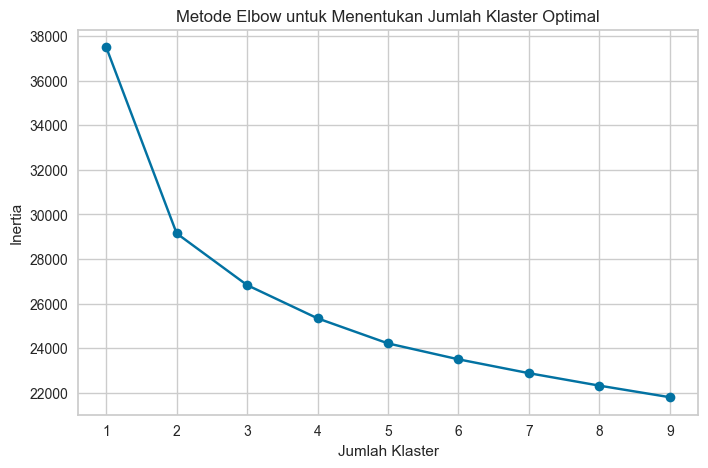

In [29]:
# Tentukan jumlah klaster optimal menggunakan metode Elbow
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numeric_data_scaled)
    distortions.append(kmeans.inertia_)

# Visualisasi elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.show()

Cluster
3    988
0    583
1    472
2    457
Name: count, dtype: int64


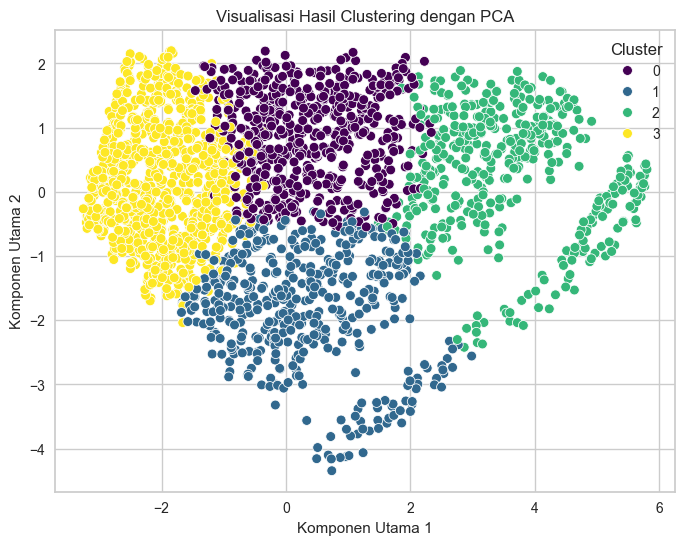

In [30]:
# Menentukan jumlah klaster optimal berdasarkan hasil Elbow Method
k_optimal = 4  # Gantilah sesuai dengan hasil elbow method

# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(numeric_data_scaled)

# Tambahkan hasil klaster ke dalam dataframe
sales_df['Cluster'] = clusters

# Lihat distribusi klaster
print(sales_df['Cluster'].value_counts())

# Visualisasi hasil clustering (gunakan dua dimensi utama PCA untuk reduksi dimensi)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=numeric_data_pca[:, 0], y=numeric_data_pca[:, 1], hue=sales_df['Cluster'], palette="viridis", s=50)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Cluster")
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

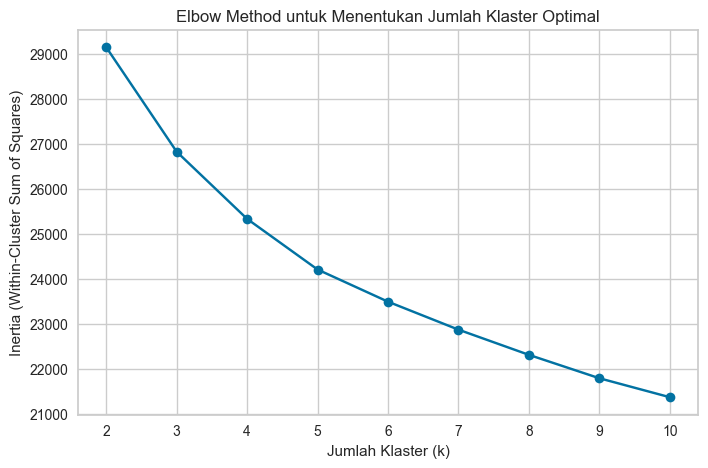

In [31]:
# Rentang jumlah klaster yang akan diuji
K = range(2, 11)  # Dari 2 hingga 10 klaster
distortions = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numeric_data_scaled)  # Gunakan data yang telah dinormalisasi
    distortions.append(kmeans.inertia_)  # Simpan nilai inertia

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method untuk Menentukan Jumlah Klaster Optimal")
plt.xticks(K)
plt.show()

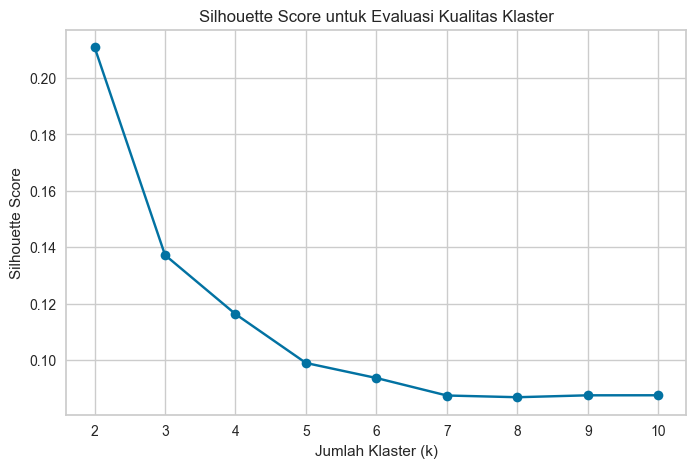

In [32]:
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(numeric_data_scaled)
    score = silhouette_score(numeric_data_scaled, cluster_labels)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Evaluasi Kualitas Klaster")
plt.xticks(K)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

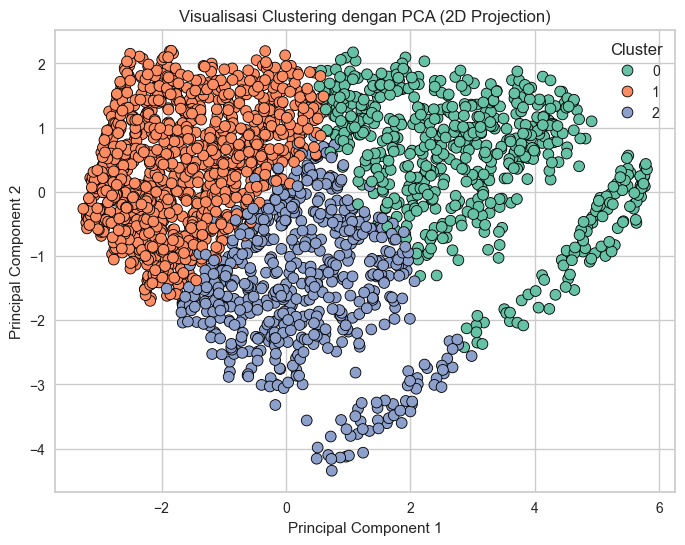

In [33]:
# Melatih K-Means dengan jumlah cluster optimal
optimal_k = 3  # Gantilah dengan jumlah klaster hasil Elbow/Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(numeric_data_scaled)

# Reduksi dimensi ke 2D menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_data_scaled)

# Konversi ke DataFrame untuk visualisasi
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df, s=60, edgecolor='black')
plt.title("Visualisasi Clustering dengan PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [34]:
# Select only numerical columns before calculating the mean
numerical_cols = sales_df.select_dtypes(include=['number']).columns
sales_df.groupby('Cluster')[numerical_cols].mean()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order Month,Order Weekday,Unit Margin,Cluster
Cluster,,,,,,,,,,,,,,,,
0,3.147513,92.850772,4.675815,0.591767,1.542024,0.722537,-0.172314,-0.192885,0.208723,0.152844,0.310390,0.239709,-0.083982,3.185249,-0.071196,0.0
1,3.286017,93.781780,5.368644,0.493644,1.472458,-1.031281,0.872092,0.819343,-0.349522,-0.316806,-0.365405,0.216511,0.013531,3.430085,0.768800,1.0
2,3.113786,95.194748,6.052516,0.463895,1.496718,0.800939,1.252539,1.207833,1.503430,1.408102,1.325348,-0.044251,-0.020725,3.374179,1.023321,2.0
3,3.064777,88.914980,5.688259,0.433198,1.441296,-0.304153,-0.894310,-0.836293,-0.746412,-0.708096,-0.701022,-0.224414,0.052678,3.379555,-0.798607,3.0


In [35]:
# Select categorical columns using their original data types before encoding
categorical_cols = sales_df.select_dtypes(include=['object', 'category']).columns

# Melihat kategori dominan dalam setiap cluster
# Only aggregate if there are categorical columns
if len(categorical_cols) > 0:
    cluster_categorical = sales_df.groupby('Cluster')[categorical_cols].agg(lambda x: x.value_counts().index[0] if not x.empty else np.nan) # Handle empty series

    # Tampilkan hasil
    print(cluster_categorical)
else:
    print("Tidak ada kolom kategorikal untuk dianalisis.")

        Profit Category
Cluster                
0                Medium
1                   Low
2                  High
3                   Low


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [36]:
# Analisis karakteristik setiap cluster
for cluster_label in sales_df['Cluster'].unique():
    cluster_data = sales_df[sales_df['Cluster'] == cluster_label]

    print(f"\n=== Karakteristik Cluster {cluster_label} ===")

    # Statistik deskriptif untuk fitur numerik
    print("\nStatistik Deskriptif:")
    print(cluster_data[numerical_cols].describe())

    # Analisis fitur kategorikal
    for col in categorical_cols:
        print(f"\nDistribusi nilai untuk '{col}' di Cluster {cluster_label}:")
        print(cluster_data[col].value_counts())



=== Karakteristik Cluster 2 ===

Statistik Deskriptif:
           Region     Country   Item Type  Sales Channel  Order Priority  \
count  457.000000  457.000000  457.000000     457.000000      457.000000   
mean     3.113786   95.194748    6.052516       0.463895        1.496718   
std      2.033752   55.177816    2.692884       0.499241        1.133854   
min      0.000000    0.000000    0.000000       0.000000        0.000000   
25%      1.000000   44.000000    4.000000       0.000000        0.000000   
50%      3.000000   96.000000    6.000000       0.000000        1.000000   
75%      5.000000  149.000000    8.000000       1.000000        3.000000   
max      6.000000  184.000000   11.000000       1.000000        3.000000   

       Units Sold  Unit Price   Unit Cost  Total Revenue  Total Cost  \
count  457.000000  457.000000  457.000000     457.000000  457.000000   
mean     0.800939    1.252539    1.207833       1.503430    1.408102   
std      0.583146    0.638963    0.809414  

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

### Interpretasi Tiap Cluster

**Cluster 0 - Profit Rendah-Menengah, Produk dengan Harga & Biaya Rendah**
- **Karakteristik:**  
  - Mayoritas transaksi memiliki kategori profit **rendah (220)** dan **menengah (114)**, dengan hanya **11 transaksi dalam kategori profit tinggi**.
  - **Item Type:** Dominasi oleh kategori produk dengan harga dan biaya yang lebih rendah.
  - **Sales Channel:** Proporsi yang seimbang antara kanal penjualan offline dan online.
  - **Order Weekday:** Hari pesanan tersebar merata, dengan jumlah tertinggi pada **Rabu (57), Kamis (52), dan Senin (52)**.
  - **Order Ship Days:** Rata-rata waktu pengiriman **24,74 hari**, cukup standar.

---

**Cluster 1 - Profit Sangat Rendah, Produk dengan Harga & Biaya Tinggi**
- **Karakteristik:**  
  - **Profit sangat rendah**, dengan **287 transaksi dalam kategori profit rendah**, 49 dalam kategori menengah, dan **tidak ada transaksi dengan profit tinggi**.
  - **Item Type:** Produk dalam kategori harga dan biaya yang lebih tinggi.
  - **Sales Channel:** Hampir 50:50 antara online dan offline.
  - **Order Weekday:** **Senin (59), Jumat (53), dan Sabtu (53)** memiliki transaksi terbanyak.
  - **Order Ship Days:** Rata-rata pengiriman **25,07 hari**.

---

**Cluster 2 - Profit Tinggi, Produk dengan Harga & Biaya Sedang**
- **Karakteristik:**  
  - **Profit tinggi** dengan **108 transaksi dalam kategori profit tinggi**, 49 menengah, dan hanya 9 transaksi dengan profit rendah.
  - **Item Type:** Produk dengan harga dan biaya dalam kisaran **sedang-tinggi**.
  - **Sales Channel:** Lebih banyak menggunakan **kanal penjualan offline**.
  - **Order Weekday:** **Selasa (28), Minggu (27), dan Senin (26)** mendominasi.
  - **Order Ship Days:** Rata-rata pengiriman **24,67 hari**.

---

**Cluster 3 - Profit Menengah, Produk dengan Harga & Biaya Variatif**
- **Karakteristik:**  
  - Sebaran profit relatif berimbang, dengan transaksi dalam semua kategori profit.
  - **Item Type:** Produk dengan rentang harga dan biaya yang lebih luas.
  - **Sales Channel:** Cenderung lebih banyak offline.
  - **Order Weekday:** **Rabu (57) dan Kamis (52)** cukup dominan.
  - **Order Ship Days:** Rata-rata pengiriman **24,74 hari**.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
from google.colab import files
sales_df.to_csv('hasil_clustering.csv', index=False)
files.download('hasil_clustering.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>